<a href="https://colab.research.google.com/github/keneishapais/TechRush/blob/main/XGB_Solar_Energy_Prediction_Model_SST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solar Energy Prediction ML Model**



## **1. Loading the dataset**
The Model is trained on weather data of Asian region. The data is collected from NSRDB.

#### **Importing Required Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import r2_score

#### **Loading the dataset**

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Weather_Dataset.csv')
df.head()

Saving Weather_Dataset.csv to Weather_Dataset.csv


,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2018,1,1,0,0,0,0,14.2,951,177.95,0.17,0,18.23,1.0
1,2018,1,1,1,0,0,0,14.0,951,164.33,0.17,0,18.38,0.9
2,2018,1,1,2,0,0,0,13.8,951,150.54,0.17,0,18.67,0.8
3,2018,1,1,3,0,0,0,13.3,951,136.83,0.17,0,19.35,0.8
4,2018,1,1,4,0,0,0,13.0,951,123.25,0.17,0,19.73,0.9


## **2. Data Preparation**
From the dataset dropping off the columns, containing the parameters which are not directly releated to weather.

In [3]:
drop_cols = ['Year', 'Day', 'DNI', 'DHI', 'Solar Zenith Angle']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)
df.head()

,Month,Hour,GHI,Temperature,Pressure,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,1,0,0,14.2,951,0.17,0,18.23,1.0
1,1,1,0,14.0,951,0.17,0,18.38,0.9
2,1,2,0,13.8,951,0.17,0,18.67,0.8
3,1,3,0,13.3,951,0.17,0,19.35,0.8
4,1,4,0,13.0,951,0.17,0,19.73,0.9


Prepare the Target Feature

In [4]:
y = pd.to_numeric(df['GHI'], errors='coerce').fillna(0)
X = df.drop('GHI', axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)

### **Data Splitting**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Final Dataset**
#### which includes only weather parameters

In [6]:
df.head()

,Month,Hour,GHI,Temperature,Pressure,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,1,0,0,14.2,951,0.17,0,18.23,1.0
1,1,1,0,14.0,951,0.17,0,18.38,0.9
2,1,2,0,13.8,951,0.17,0,18.67,0.8
3,1,3,0,13.3,951,0.17,0,19.35,0.8
4,1,4,0,13.0,951,0.17,0,19.73,0.9


## **3. Model Building**

### **XGBoost Model**

#### **Reason For selecting XGBoost:**
#### We selected XGBoost because it consistently delivers high accuracy, handles non-linear relationships, and effectively manages missing or noisy data. For solar energy prediction using weather variables such as temperature, humidity, wind speed, and solar zenith angle, pressure, XGBoost’s gradient boosting approach captures complex interactions between features while avoiding overfitting through regularization. Its speed, scalability, and proven performance make it well-suited for time-series and environmental datasets.

### **Training the Model**

In [7]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


### **Data Prediction & Evaluation**

In [8]:
from sklearn.metrics import r2_score
y_train_pred_bef = model.predict(X_train)
y_test_pred_bef = model.predict(X_test)

print(f"Train R²: {r2_score(y_train, y_train_pred_bef):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_bef):.4f}")


Train R²: 0.9814
Test R²: 0.9692


### **Saving the Model**

In [19]:
import joblib
joblib.dump(model, 'xgb_trained_model.pkl')

['xgb_trained_model.pkl']

## **4. Hyper Parameter Tuning**

### **Import necessary libraries**

In [20]:
!pip install catboost
!pip install optuna
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### **Load and Prepare the Data**

In [21]:
df = pd.read_csv("Weather_Dataset.csv")
drop_cols = ['Year','Day','DNI','DHI','Solar Zenith Angle']  # dropping non weather columns
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

y = pd.to_numeric(df['GHI'], errors='coerce')
X = df.drop('GHI', axis=1).apply(pd.to_numeric, errors='coerce')

X = X.fillna(0)
y = y.fillna(0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
df.head()

,Month,Hour,GHI,Temperature,Pressure,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,1,0,0,14.2,951,0.17,0,18.23,1.0
1,1,1,0,14.0,951,0.17,0,18.38,0.9
2,1,2,0,13.8,951,0.17,0,18.67,0.8
3,1,3,0,13.3,951,0.17,0,19.35,0.8
4,1,4,0,13.0,951,0.17,0,19.73,0.9


### **Define Model and Parameter Grid**

In [22]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': False,
        'random_seed': 42,
        'task_type': 'CPU'
    }

    model = CatBoostRegressor(**param)
    model.fit(
        X_tr, y_tr,
        eval_set=(X_val, y_val),
        early_stopping_rounds=50,
        use_best_model=True,
        verbose=False
    )
    preds = model.predict(X_val)
    return r2_score(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)


[I 2025-08-09 09:43:28,785] A new study created in memory with name: no-name-e6088eae-c745-488b-821b-122013ecf89a
[I 2025-08-09 09:43:53,261] Trial 0 finished with value: 0.9703652367075986 and parameters: {'iterations': 1617, 'depth': 10, 'learning_rate': 0.011672505305216076, 'l2_leaf_reg': 4.61159098793655, 'bagging_temperature': 0.1885149385992403, 'random_strength': 0.7339976778605375, 'border_count': 140}. Best is trial 0 with value: 0.9703652367075986.
[I 2025-08-09 09:43:55,821] Trial 1 finished with value: 0.9639078954181146 and parameters: {'iterations': 662, 'depth': 7, 'learning_rate': 0.015468582901068216, 'l2_leaf_reg': 3.913387267089454, 'bagging_temperature': 0.6607596400732753, 'random_strength': 0.5574193357578878, 'border_count': 150}. Best is trial 0 with value: 0.9703652367075986.
[I 2025-08-09 09:43:57,648] Trial 2 finished with value: 0.9700291214259871 and parameters: {'iterations': 1054, 'depth': 8, 'learning_rate': 0.19622721714269004, 'l2_leaf_reg': 7.7477943

Best params: {'iterations': 1749, 'depth': 9, 'learning_rate': 0.08509893056659468, 'l2_leaf_reg': 2.795166065450873, 'bagging_temperature': 0.13381104220594792, 'random_strength': 0.1634940627409749, 'border_count': 215}


## **Train Final model**

In [23]:
best_params = study.best_params
best_params.update({'verbose': False, 'random_seed': 42, 'task_type': 'CPU'})

final_model = CatBoostRegressor(**best_params)
final_model.fit(X_train, y_train)

### **Model Evaluation**

In [24]:
y_pred_test = final_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)

y_train_pred = model.predict(X_train)
print("After Hyperparameter Tuning: ")
print("Test set R2 score:", test_r2)
print(f"Train set R²: {r2_score(y_train, y_train_pred):.4f}")

After Hyperparameter Tuning: 
Test set R2 score: 0.9728122646761761
Train set R²: 0.9814


### **Saving the best model**

In [25]:
import joblib
joblib.dump(model, 'xgb_final_tuned_model.pkl')

['xgb_final_tuned_model.pkl']

## **5. Model Visuals**

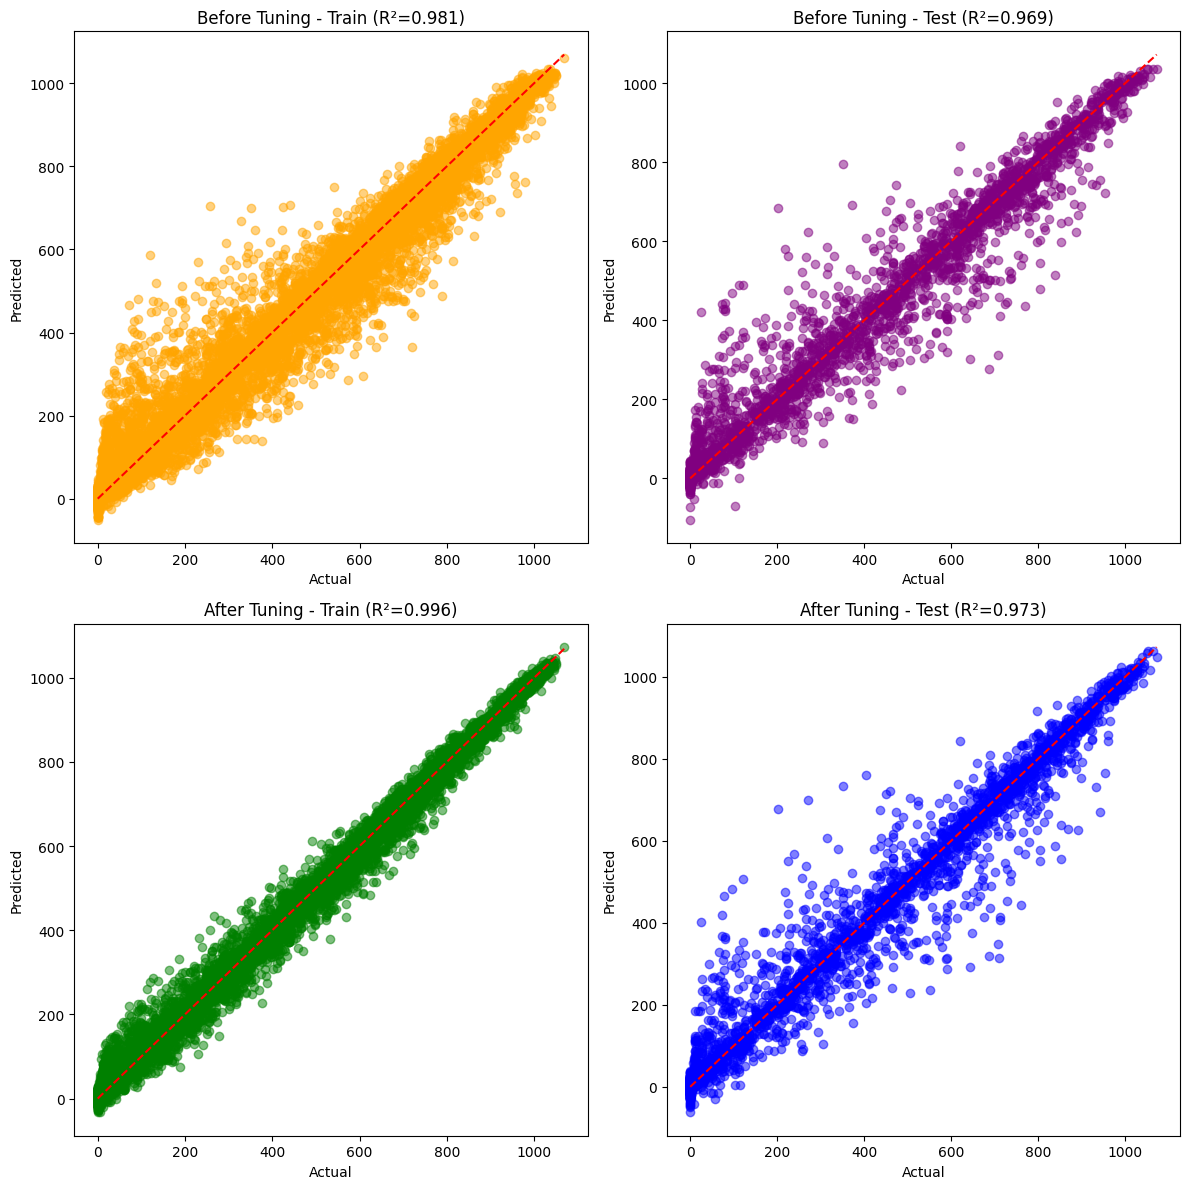

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R² values first
train_r2_before = r2_score(y_train, y_train_pred_bef)
test_r2_before = r2_score(y_test, y_test_pred_bef)

train_r2_after = r2_score(y_train, final_model.predict(X_train))
test_r2_after = r2_score(y_test, y_pred_test)

plt.figure(figsize=(12, 12))

# Before Hypertuning - Train set
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_train_pred_bef, color='orange', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Before Tuning - Train (R²={train_r2_before:.3f})")

# Before Hypertuning - Test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_test_pred_bef, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Before Tuning - Test (R²={test_r2_before:.3f})")

# After Hypertuning - Train set
plt.subplot(2, 2, 3)
plt.scatter(y_train, final_model.predict(X_train), color='green', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"After Tuning - Train (R²={train_r2_after:.3f})")

# After Hypertuning - Test set
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"After Tuning - Test (R²={test_r2_after:.3f})")

plt.tight_layout()
plt.show()

## **6. Testing the Model**
###using various other datasets

In [33]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Trained Model
model_path = "xgb_final_tuned_model.pkl"
model = joblib.load(model_path)

# Loading new dataset for testing
dataset_path = "USA_1999.csv"
df = pd.read_csv(dataset_path)

# Dropping the columns that  weren't used in training
cols_to_drop = ['DHI', 'DNI', 'Year', 'Day']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Preparing features and target
features = ['Month', 'Hour', 'Temperature', 'Pressure',
            'Surface Albedo', 'Cloud Type', 'Relative Humidity', 'Wind Speed']
target = "GHI"
df.head()

# Ensure that all mandatory feature columns exist in test data
for col in features:
    if col not in df.columns:
        print(f"Missing column '{col}' in test data — filling with 0.")
        df[col] = 0

# Ensure the correct column order
X_test = df[features]

# Handle missing target column
if target in df.columns:
    y_test = df[target]
else:
    print(f"Target column '{target}' not found in dataset. Using zeros.")
    y_test = pd.Series([0] * len(df))

#Making Prediction
y_pred = model.predict(X_test)

# Evaluate the results
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Evaluation on New Dataset")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Model Evaluation on New Dataset
MSE: 10884.2031
RMSE: 104.3274
R²: 0.8508


## **Model is Completed!!!**